I will take a look at how kernel ridge regression can be derived from linear regression and ridge regression in this article. I will further show how this knowledge can be used to derive a more specialized model that can be used for reinforcement learning: cost-regularized kernel regression (CrKR). CrKR  also predicts the standard deviation similar to Gaussian process regression.

## Linear Regression

In linear regression we seek to maximize the [likelihood of the model given the data](http://alexanderfabisch.github.io/maximum-likelihood.html#Linear-Regression). This is equivalent to minimizing the negative log-likelihood, which is the [sum of squared errors](http://alexanderfabisch.github.io/regression.html#Linear-Regression). Our model is $\boldsymbol{y} = \boldsymbol{\Phi} \boldsymbol{w}$, where $\boldsymbol{y} \in \mathbb{R}^N$ contains the predictions of a 1D regression problem, $\boldsymbol{\Phi} \in \mathbb{R}^{N \times D}$ contains features of input vectors $\phi(\boldsymbol{x_n})$ in each row, $\boldsymbol{w} \in \mathbb{R}^D$ are the model parameters. For a dataset $(\boldsymbol{\Phi}, \boldsymbol{y})$ we want to find

$$\arg\min_\boldsymbol{w} \mathcal{L}(\boldsymbol{w}) = \arg\min_\boldsymbol{w} \frac{1}{2} ||\boldsymbol{y} - \boldsymbol{\Phi} \boldsymbol{w}||_2^2$$

Let us rewrite the objective function (loss) a little bit:
$$\mathcal{L}(\boldsymbol{w}) = \frac{1}{2} \left( \boldsymbol{y} - \boldsymbol{\Phi} \boldsymbol{w} \right)^T \left( \boldsymbol{y} - \boldsymbol{\Phi} \boldsymbol{w} \right) = \frac{1}{2} \boldsymbol{y}^T \boldsymbol{y} - \left[ \frac{1}{2} \boldsymbol{y}^T \boldsymbol{\Phi} \boldsymbol{w} - \frac{1}{2} \boldsymbol{w}^T \boldsymbol{\Phi}^T \boldsymbol{y} \right] + \frac{1}{2} \boldsymbol{w}^T\boldsymbol{\Phi}^T \boldsymbol{\Phi} \boldsymbol{w}$$

Because $\boldsymbol{y}^T \boldsymbol{\Phi} \boldsymbol{w} = \sum_n \sum_d \boldsymbol{y}_n \boldsymbol{\Phi_{n,d} \boldsymbol{w}_d} = \sum_n \sum_d \boldsymbol{w}_d \boldsymbol{\Phi}^T_{d,n} \boldsymbol{y}_n = \boldsymbol{w}^T \boldsymbol{\Phi}^T \boldsymbol{y}$, we can write
$$\mathcal{L}(\boldsymbol{w}) = \frac{1}{2} \boldsymbol{y}^T \boldsymbol{y} - \boldsymbol{w}^T \boldsymbol{\Phi}^T \boldsymbol{y} + \frac{1}{2} \boldsymbol{w}^T\boldsymbol{\Phi}^T \boldsymbol{\Phi} \boldsymbol{w}$$

Now it is easy to compute the derivatives (see Section 2.4.4 of [The Matrix Cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf)).

**Gradient:**
$$\nabla \mathcal{L}(\boldsymbol{w}) = - \boldsymbol{\Phi}^T \boldsymbol{y} + \frac{1}{2} \left( \boldsymbol{\Phi}^T \boldsymbol{\Phi} + \left( \boldsymbol{\Phi}^T \boldsymbol{\Phi} \right)^T \right) \boldsymbol{w}$$
$\boldsymbol{\Phi}^T \boldsymbol{\Phi}$ is symmetric, because $\boldsymbol{\Phi}^T \boldsymbol{\Phi} = \left(\boldsymbol{\Phi}^T \left( \boldsymbol{\Phi}^T \right)^T \right)^T = \left(\boldsymbol{\Phi}^T \boldsymbol{\Phi}\right)^T$, hence we can simplify the gradient to
$$\nabla \mathcal{L}(\boldsymbol{w}) = - \boldsymbol{\Phi}^T \boldsymbol{y} + \boldsymbol{\Phi}^T \boldsymbol{\Phi} \boldsymbol{w}$$

**Hessian:**
$$\nabla \nabla \mathcal{L}(\boldsymbol{w}) = \boldsymbol{\Phi}^T \boldsymbol{\Phi}$$

A convex [quadratic function](http://alexanderfabisch.github.io/bfgs.html#Minimizing-Quadratic-Functions) would have a positive definite Hessian. $\boldsymbol{\Phi}^T \boldsymbol{\Phi} \in \mathbb{R}^{D \times D}$ is positive definite iff $\boldsymbol{\Phi}$ has a full column rank, that is, we have enough samples.

The optimum (minimum error) can be found at the zero of the gradient:

\begin{eqnarray}
&& \boldsymbol{0} = - \boldsymbol{\Phi}^T \boldsymbol{y} + \boldsymbol{\Phi}^T \boldsymbol{\Phi} \boldsymbol{w}\\
&\Leftrightarrow& \boldsymbol{\Phi}^T \boldsymbol{y} = \boldsymbol{\Phi}^T \boldsymbol{\Phi} \boldsymbol{w}\\
&\Leftrightarrow& \left( \boldsymbol{\Phi}^T \boldsymbol{\Phi} \right)^{-1} \boldsymbol{\Phi}^T \boldsymbol{y} = \boldsymbol{w}
\end{eqnarray}

## Ridge Regression

That was the hard part. The extension to ridge regression (linear regression with regularization) is [straightforward](http://alexanderfabisch.github.io/regression.html#Ridge-Regression). The loss

$$\arg\min_\boldsymbol{w} \mathcal{L}(\boldsymbol{w}) = \arg\min_\boldsymbol{w} \frac{1}{2} ||\boldsymbol{y} - \boldsymbol{\Phi} \boldsymbol{w}||_2^2 + \frac{\lambda}{2} ||\boldsymbol{w}||_2^2$$

leads to the solution

$$\left( \boldsymbol{\Phi}^T \boldsymbol{\Phi} + \lambda \boldsymbol{I} \right)^{-1} \boldsymbol{\Phi}^T \boldsymbol{y} = \boldsymbol{w}$$

## Kernel Ridge Regression

Now there are two way to derive Kernel Ridge Regression from this.

### Replacing Weights by Weighted Sum of Training Data

Let us take the loss

$$\mathcal{L}(\boldsymbol{w}) = \frac{1}{2} ||\boldsymbol{y} - \boldsymbol{\Phi} \boldsymbol{w}||_2^2 + \frac{\lambda}{2} ||\boldsymbol{w}||_2^2$$

and replace $\boldsymbol{w} = \boldsymbol{\Phi}^T \boldsymbol{\alpha}$

$$\mathcal{L}(\boldsymbol{\alpha}) = \frac{1}{2} ||\boldsymbol{y} - \boldsymbol{\Phi} \boldsymbol{\Phi}^T \boldsymbol{\alpha}||_2^2 + \frac{\lambda}{2} ||\boldsymbol{\Phi}^T \boldsymbol{\alpha}||_2^2$$

$\boldsymbol{\Phi} \boldsymbol{\Phi}^T = \boldsymbol{K} \in \mathbb{R}^{N \times N}$ is a Gram matrix, that is, it contains inner products of all inputs of the dataset.

We can rewrite this to
$$\mathcal{L}(\boldsymbol{\alpha}) = \frac{1}{2} \boldsymbol{\alpha}^T \boldsymbol{K} \boldsymbol{K} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \boldsymbol{K} \boldsymbol{y} + \frac{1}{2} \boldsymbol{y}^T \boldsymbol{y} + \frac{\lambda}{2} \boldsymbol{\alpha}^T \boldsymbol{K} \boldsymbol{\alpha}$$

The optimum is

$$\boldsymbol{\alpha} = \left( \boldsymbol{K} + \lambda \boldsymbol{I} \right)^{-1} \boldsymbol{y}$$

We can predict a new feature vector $\boldsymbol{\phi} = \phi(\boldsymbol{x})$ with
$$y = \boldsymbol{w}^T \boldsymbol{\phi} = \boldsymbol{\alpha}^T \boldsymbol{\Phi} \boldsymbol{\phi}$$

We can define
$\boldsymbol{k} = \boldsymbol{\Phi}\boldsymbol{\phi}$, hence,
$$y = \boldsymbol{\alpha}^T \boldsymbol{k}$$

Note that $\boldsymbol{k}_n = \boldsymbol{\Phi}_n \boldsymbol{\phi}$, which is an inner product. Hence, the solution $\boldsymbol{\alpha}$ and the prediction $y$ can be expressed purely in terms of inner products of the feature vectors. Hence, we can use the Kernel trick and replace those inner products with kernels. This allows us to approximate non-linear functions without actually transforming data with a nonlinear function $\phi$.

### Using a Complicated Formula

[Max Welling](https://www.ics.uci.edu/~welling/classnotes/papers_class/Kernel-Ridge.pdf) uses the formula (see also Bishop, Appendix C, Equation C.5)

$$(\boldsymbol{P}^{-1} + \boldsymbol{B}^T \boldsymbol{R}^{-1} \boldsymbol{B})^{-1} \boldsymbol{B}^T \boldsymbol{R}^{-1} = \boldsymbol{P} \boldsymbol{B}^T (\boldsymbol{B} \boldsymbol{P} \boldsymbol{B}^T + \boldsymbol{R})^{-1}$$

to go directly from the solution of ridge regression to kernel ridge regression. Let us assign the variables:
* $\boldsymbol{P}^{-1} = \lambda \boldsymbol{I}$
* $\boldsymbol{B} = \boldsymbol{\Phi}$
* $\boldsymbol{R} = \boldsymbol{I}$

Using the formula, we can transform the solution of ridge regression:
$$\boldsymbol{w} = \left[\left( \boldsymbol{\Phi}^T \boldsymbol{\Phi} + \lambda \boldsymbol{I} \right)^{-1} \boldsymbol{\Phi}^T \right] \boldsymbol{y} = \left[ \lambda^{-1} \boldsymbol{\Phi}^T \left( \lambda^{-1} \boldsymbol{\Phi} \boldsymbol{\Phi}^T + \boldsymbol{I} \right)^{-1} \right] \boldsymbol{y} = \left[ \boldsymbol{\Phi}^T \left( \boldsymbol{\Phi} \boldsymbol{\Phi}^T + \lambda \boldsymbol{I} \right)^{-1} \right] \boldsymbol{y} = \boldsymbol{\Phi}^T \left( \boldsymbol{K} + \lambda \boldsymbol{I} \right)^{-1} \boldsymbol{y}$$

We can make new predictions for a feature vector $\boldsymbol{\phi}$ with

$$y = \boldsymbol{w}^T \boldsymbol{\phi} = \left( \boldsymbol{\Phi}^T \left( \boldsymbol{K} + \lambda \boldsymbol{I} \right)^{-1} \boldsymbol{y} \right)^T \boldsymbol{\phi} = \left( \left( \boldsymbol{K} + \lambda \boldsymbol{I} \right)^{-1} \boldsymbol{y} \right)^T \boldsymbol{\Phi} \boldsymbol{\phi}$$

This is exactly the same solution because
$$\left( \boldsymbol{K} + \lambda \boldsymbol{I} \right)^{-1} \boldsymbol{y} = \boldsymbol{\alpha}$$

There is even a third way to derive this solution if you formulate it as a constraint optimization problem (see [Section 3 of this note](https://www.ics.uci.edu/~welling/classnotes/papers_class/Kernel-Ridge.pdf)) but that is unnecessarily complex.

## Example

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


This is a very simple and naive implementation of Kernel Ridge Regression.

In [2]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics.pairwise import pairwise_kernels


class KernelRidgeRegression(BaseEstimator, RegressorMixin):
    def __init__(self, kernel, lmbda, **kernel_args):
        self.kernel = kernel
        self.lmbda = lmbda
        self.kernel_args = kernel_args

    def fit(self, X, y):
        self.X = X
        K = pairwise_kernels(self.X, metric=self.kernel, **self.kernel_args)
        self.alpha = np.linalg.pinv(K + self.lmbda * np.eye(X.shape[0])).dot(y)
        return self

    def predict(self, X):
        K_star = pairwise_kernels(X, self.X, metric=self.kernel, **self.kernel_args)
        return K_star.dot(self.alpha)

We can see that it easily approximates a nonlinear function.

In [3]:
from sklearn.utils import check_random_state


def generate_data(n_samples, sigma, random_state=None):
    random_state = check_random_state(random_state)
    x = np.linspace(0, 1, n_samples)
    X = x[:, np.newaxis]
    y_true = np.cos(2 * np.pi * x)
    y = y_true + sigma * random_state.randn(n_samples)
    return x, X, y_true, y

In [4]:
def plot_model(model):
    x, X, y_true, y = generate_data(101, 0.3, 0)
    plt.plot(x, y_true, label="Latent function")
    plt.scatter(x, y, label="Samples")
    plt.plot(x, model.predict(X), label="Prediction")
    plt.xlim((0, 1))
    plt.legend()

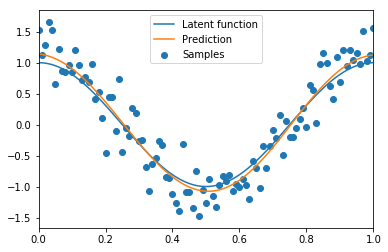

In [5]:
_, X, _, y = generate_data(101, 0.3, 0)
plot_model(KernelRidgeRegression("rbf", lmbda=1.0, gamma=10.0).fit(X, y))

## Cost-regularized Kernel Regression

In reinforcement learning, we often rely on regression algorithms. Most of them are based on standard algorithms like linear regression, kernel ridge regression or Gaussian process regression but they often take into account sample weights. Samples with high rewards usually get high weights and samples with low rewards get low weights.

One of these regression algorithms is reward-weighted regression (RWR) from this paper:

Peters, Schaal: **Using Reward-weighted Regression for Reinforcement Learning of Task Space Control** (2007). [PDF](https://pdfs.semanticscholar.org/bfae/5789c3f742816df4baa86b97a1e3bacd856b.pdf)

It is essentially linear regression with weighted samples, that is,

$$\boldsymbol{W} = (\boldsymbol{\Phi}^T \boldsymbol{R} \boldsymbol{\Phi} + \lambda \boldsymbol{I})^{-1}\boldsymbol{\Phi}^T \boldsymbol{R} \boldsymbol{Y},$$

where $\boldsymbol{R}$ is a diagonal matrix that contains a weight per sample. $\lambda = 0$ in this paper, but I already introduced regularization here to save one step.

This has been extended to a form of kernel ridge regression similar to the second method that we used to derive kernel ridge regression from ridge regression in the following paper:

Kober, Wilhelm, Oztop, Peters: **Reinforcement Learning to Adjust Parametrized Motor Primitives to New Situations** (2012). [Autonomous Robots](https://link.springer.com/article/10.1007/s10514-012-9290-3) [PDF](https://pdfs.semanticscholar.org/131f/7b7404c0f3896f7234299a936122c5b0e5fa.pdf)

From reward-weighted regression,

$$\boldsymbol{w} = (\boldsymbol{\Phi}^T \boldsymbol{R} \boldsymbol{\Phi} + \lambda \boldsymbol{I})^{-1}\boldsymbol{\Phi}^T \boldsymbol{R} \boldsymbol{y},$$

we can go to cost-regularized kernel regression

$$\left[ (\boldsymbol{\Phi}^T \boldsymbol{R} \boldsymbol{\Phi} + \lambda I)^{-1} \boldsymbol{\Phi}^T \boldsymbol{R} \right] \boldsymbol{y} = \left[ \lambda^{-1} \boldsymbol{\Phi}^T (\boldsymbol{\Phi} \lambda^{-1} \boldsymbol{\Phi}^T + \boldsymbol{R}^{-1})^{-1} \right] \boldsymbol{y} = \left[ \boldsymbol{\Phi}^T(\boldsymbol{\Phi} \boldsymbol{\Phi}^T + \lambda \boldsymbol{R}^{-1})^{-1} \right] \boldsymbol{y}$$

Note that we have to learn a separate model for each output dimension.

Predictions can be made with:

$$\phi(\boldsymbol{x})^T \boldsymbol{w} = \phi(\boldsymbol{x})^T \boldsymbol{\Phi}^T(\boldsymbol{\Phi} \boldsymbol{\Phi}^T + \lambda R^{-1})^{-1} \boldsymbol{y} = \boldsymbol{\phi}^T (\boldsymbol{K} + \lambda \boldsymbol{R}^{-1})^{-1} \boldsymbol{y},$$

where $\boldsymbol{\alpha} = (\boldsymbol{K} + \lambda \boldsymbol{R}^{-1})^{-1} \boldsymbol{y}$ can be precomputed.

Similar to [Gaussian process regression](http://alexanderfabisch.github.io/regression.html#Gaussian-Process-Regression), we can also compute a standard deviation of the prediction:
$$\sigma^2 = k(\boldsymbol{x}, \boldsymbol{x}) + \lambda - k(\boldsymbol{x})^T \left(\boldsymbol{K} + \lambda \boldsymbol{R}^{-1}\right)^{-1} k(\boldsymbol{x}),$$

where $k(\boldsymbol{x}, \boldsymbol{x})$ is the kernel of the sample with itself and $k(\boldsymbol{x})$ is a vector that contains the kernels between the sample and the whole training set.

## Example

This is an implementation of Cost-regularized Kernel Regression (CrKR).

In [6]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics.pairwise import pairwise_kernels


class CostRegularizedKernelRegression(BaseEstimator, RegressorMixin):
    def __init__(self, kernel, lmbda, **kernel_args):
        self.kernel = kernel
        self.lmbda = lmbda
        self.kernel_args = kernel_args

    def fit(self, X, y, sample_weights):
        self.X = X
        K = pairwise_kernels(self.X, metric=self.kernel, **self.kernel_args)
        self.tmp = np.linalg.pinv(K + self.lmbda * np.diag(1.0 / sample_weights))
        self.alpha = self.tmp.dot(y)
        return self

    def predict(self, X, return_std=False):
        K_star = pairwise_kernels(X, self.X, metric=self.kernel, **self.kernel_args)
        y = K_star.dot(self.alpha)
        if return_std:
            y_std = np.empty(X.shape[0])
            K_ss = np.diag(
                pairwise_kernels(X, metric=self.kernel, **self.kernel_args))
            for i in range(X.shape[0]):
                y_std[i] = np.sqrt(K_ss[i] + self.lmbda -
                                   K_star[i].dot(self.tmp).dot(K_star[i]))
            return y, y_std
        else:
            return y

Let us generate a simple dataset with sample weights.

In [7]:
def generate_weighted_data():
    _, X_tmp, _, y_tmp = generate_data(101, 0.3, 0)
    X = np.vstack((X_tmp, X_tmp))
    y = np.hstack((y_tmp, -2 * y_tmp))
    sample_weights = np.hstack((np.ones(25), 0.1 * np.ones(51), np.ones(25),
                                0.1 * np.ones(25), np.ones(51), 0.1 * np.ones(25)))
    return X, y, sample_weights

This plot shows the dataset and compares the prediction of kernel ridge regression and CrKR. The size of the data points indicates their weights. Hence, an good weighted regression algorithm should almost only take the upper samples into account. This is what CrKR does. Kernel Ridge Regression does not know the sample weights and tries to predict the mean of all data points at a location.

In [8]:
def plot_weighted_models(models, X, y, sample_weights):
    plt.scatter(X.ravel(), y, label="Samples", s=20 * sample_weights)
    x_test = np.linspace(0, 1, 101)
    for name, model in models.items():
        plt.plot(x_test, model.predict(x_test[:, np.newaxis]), label=name)
    plt.xlim((0, 1))
    plt.legend()

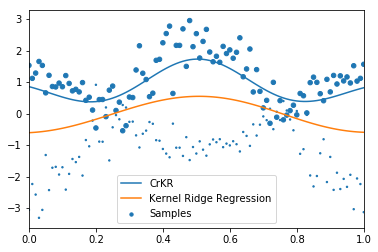

In [9]:
X_w, y_w, sample_weights = generate_weighted_data()
plot_weighted_models(
    {"Kernel Ridge Regression":
     KernelRidgeRegression("rbf", lmbda=1.0, gamma=10.0).fit(X_w, y_w),
     "CrKR":
     CostRegularizedKernelRegression("rbf", lmbda=1.0, gamma=10.0).fit(
        X_w, y_w, sample_weights)},
    X_w, y_w, sample_weights)

We can also plot the predicted standard deviation:

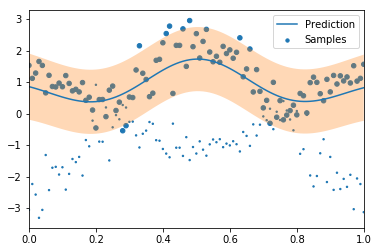

In [10]:
model = CostRegularizedKernelRegression(
    "rbf", lmbda=1.0, gamma=10.0).fit(X_w, y_w, sample_weights)

plt.scatter(X_w.ravel(), y_w, label="Samples",
            s=20 * sample_weights)
x_test = np.linspace(0, 1, 101)
y_test, y_test_std = model.predict(
    x_test[:, np.newaxis], return_std=True)
plt.plot(x_test, y_test, label="Prediction")
plt.fill_between(x_test, y_test - y_test_std,
                 y_test + y_test_std, alpha=0.3)
plt.xlim((0, 1))
plt.legend()